In [115]:
#importing packages & libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [181]:
# Assign the filename: oecd_usd_priv_pens (Total assets in funded and private pension plans, in USD million, 2001-2021)
oecd_usd_priv_pens = "/Users/andrewquinn/Analytics Project/Pension-Markets-in-Focus-2022-Statistical-Annex/Table A.B.2 Total assets in funded and private pension plans, in USD million, 2001-2021-Table 1.csv"
# Read the file into a DataFrame: df
df = pd.read_csv(oecd_usd_priv_pens)
# View the head of the DataFrame
print(df.head())
print(df.shape)

  OECD countries     2001     2002     2003       2004       2005       2006  \
0      Australia  263,408  292,623  358,915    442,936    583,888    678,162   
1    Austria (1)    5,585    8,749   11,795     14,125     13,833     16,783   
2    Belgium (2)   12,572   13,829   13,585     15,737     80,257     93,596   
3     Canada (3)  741,658  721,408  974,754  1,176,362  1,372,019  1,535,715   
4          Chile   35,385   35,826   49,224     60,535     74,508     88,293   

        2007       2008       2009  ...       2015       2016       2017  \
0  1,014,341  1,095,339    867,429  ...  1,517,613  1,532,849  1,838,865   
1     19,359     17,460     20,259  ...     22,393     21,980     26,772   
2    114,350    107,602    120,155  ...    132,722    138,317    190,735   
3  1,951,002  1,391,903  1,711,494  ...  2,225,732  2,378,020  2,721,976   
4    111,277     74,313    118,052  ...    154,711    174,480    210,512   

        2018       2019       2020       2021 Unnamed: 22 Unna

In [182]:
# Identify a list of columns to delete
columns_to_delete = df.columns[1:20]  

# Delete this list using .drop
df = df.drop(columns=columns_to_delete)  # Drop the specified columns

# Check if list of columns have been removed
print(df.head())
print(df.shape)

  OECD countries       2020       2021 Unnamed: 22  Unnamed: 23  Unnamed: 24
0      Australia  1,797,259  2,291,929                      NaN          NaN
1    Austria (1)     30,634     30,550                      NaN          NaN
2    Belgium (2)    223,702         ..                      NaN          NaN
3     Canada (3)  3,081,679  3,218,436                      NaN          NaN
4          Chile    208,482    167,556                      NaN          NaN
(100, 6)


In [183]:
# Remove the last four columns
df = df.iloc[:, :-4]  

# Check if last four columns have been removed
print(df.head())
print(df.shape)

  OECD countries       2020
0      Australia  1,797,259
1    Austria (1)     30,634
2    Belgium (2)    223,702
3     Canada (3)  3,081,679
4          Chile    208,482
(100, 2)


In [184]:
print(df.tail(6))

                                       OECD countries        2020
94                                      Zimbabwe (32)       1,348
95                           Regional indicators (33)         NaN
96                                         Total OECD  54,308,166
97                            Total selected non-OECD   1,999,975
98                                                NaN         NaN
99  Note: The total amount of investments of funde...         NaN


In [185]:
# Remove the last five rows
df = df.iloc[:-5, :]  

# Check if last 5 rows have been removed
print(df.tail(6))
print(df.shape)

         OECD countries    2020
89  Trinidad and Tobago   8,140
90               Uganda   4,161
91              Ukraine     123
92              Uruguay  16,143
93               Zambia     525
94        Zimbabwe (32)   1,348
(95, 2)


In [186]:
#Remove nil values and check result
df=df.dropna()
print(df)

   OECD countries       2020
0       Australia  1,797,259
1     Austria (1)     30,634
2     Belgium (2)    223,702
3      Canada (3)  3,081,679
4           Chile    208,482
..            ...        ...
90         Uganda      4,161
91        Ukraine        123
92        Uruguay     16,143
93         Zambia        525
94  Zimbabwe (32)      1,348

[94 rows x 2 columns]


In [187]:
# Only 1 row removed, on investigation ".." in the dataframe is not a missing value, delete this field using boolean indexing instead
df = df[~df.eq('..').any(axis=1)]
print(df)

   OECD countries       2020
0       Australia  1,797,259
1     Austria (1)     30,634
2     Belgium (2)    223,702
3      Canada (3)  3,081,679
4           Chile    208,482
..            ...        ...
90         Uganda      4,161
91        Ukraine        123
92        Uruguay     16,143
93         Zambia        525
94  Zimbabwe (32)      1,348

[86 rows x 2 columns]


In [188]:
#Repeat above steps for new dataframe df1 (Total assets in funded and private pension plans, as a % of GDP, 2001-2021)
oecd_gdp_priv_pens = "/Users/andrewquinn/Analytics Project/Pension-Markets-in-Focus-2022-Statistical-Annex/Total assets in funded and private pension plans, as a % of GDP, 2001-2021-Table 1_modified.csv"
df1 = pd.read_csv(oecd_gdp_priv_pens)
columns_to_delete = df1.columns[1:20]  
df1 = df1.drop(columns=columns_to_delete)  
df1 = df1.iloc[:-5, :-4] 
df1=df1.dropna()
df1 = df1[~df1.eq('..').any(axis=1)]
print(df1)

              Countries   2020
0             Australia  132.2
1           Austria (1)    6.6
2           Belgium (2)   39.9
3            Canada (3)  179.5
4                 Chile   75.9
..                  ...    ...
86             Suriname   13.1
88             Thailand    8.1
89  Trinidad and Tobago   37.9
90               Uganda   10.8
91              Ukraine    0.1

[82 rows x 2 columns]


In [189]:
#combine the two dataframes as "merged_df"
merged_df = pd.merge(df1, df, left_on='Countries', right_on='OECD countries', how='inner', suffixes =(' %GDP', ' $Mil'))
merged_df = merged_df.drop('OECD countries', axis=1)
print(merged_df)

              Countries 2020 %GDP  2020 $Mil
0             Australia     132.2  1,797,259
1           Austria (1)       6.6     30,634
2           Belgium (2)      39.9    223,702
3            Canada (3)     179.5  3,081,679
4                 Chile      75.9    208,482
..                  ...       ...        ...
77             Suriname      13.1        355
78             Thailand       8.1     42,198
79  Trinidad and Tobago      37.9      8,140
80               Uganda      10.8      4,161
81              Ukraine       0.1        123

[82 rows x 3 columns]


In [190]:
# List of countries in the "OECD Countries" group
oecd_countries = [
    'Australia', 'Austria (1)', 'Belgium (2)', 'Canada (3)', 'Chile', 'Colombia', 'Costa Rica (4)',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland (5)', 'Germany', 'Greece (6)',
    'Hungary (7)', 'Iceland (8)', 'Israel', 'Italy (10)', 'Japan',
    'Korea (11)', 'Latvia', 'Lithuania', 'Luxembourg (12)', 'Mexico (13)', 'Netherlands',
    'New Zealand', 'Norway (14)', 'Poland (15)', 'Portugal (16)', 'Slovak Republic (17)',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland (18)', 'Türkiye (19)', 'United Kingdom (20)',
    'United States'
]

# Create a new column "Group" and assign respective group names

merged_df['Group'] = ''
merged_df.loc[merged_df['Countries'].isin(oecd_countries), 'Group'] = 'OECD Countries'
merged_df.loc[merged_df['Countries'] == 'Ireland (9)', 'Group'] = 'Ireland'
merged_df.loc[merged_df['Group'] == '', 'Group'] = 'Non-OECD Countries'
print(merged_df)

              Countries 2020 %GDP  2020 $Mil               Group
0             Australia     132.2  1,797,259      OECD Countries
1           Austria (1)       6.6     30,634      OECD Countries
2           Belgium (2)      39.9    223,702      OECD Countries
3            Canada (3)     179.5  3,081,679      OECD Countries
4                 Chile      75.9    208,482      OECD Countries
..                  ...       ...        ...                 ...
77             Suriname      13.1        355  Non-OECD Countries
78             Thailand       8.1     42,198  Non-OECD Countries
79  Trinidad and Tobago      37.9      8,140  Non-OECD Countries
80               Uganda      10.8      4,161  Non-OECD Countries
81              Ukraine       0.1        123  Non-OECD Countries

[82 rows x 4 columns]


In [191]:
merged_df.dtypes

Countries    object
2020 %GDP    object
2020 $Mil    object
Group        object
dtype: object

In [192]:
#Convert specific columns to numeric
merged_df['2020 $Mil'] = merged_df['2020 $Mil'].str.replace(',','').astype(float)
merged_df['2020 %GDP'] = merged_df['2020 %GDP'].astype(float)
merged_df.dtypes

Countries     object
2020 %GDP    float64
2020 $Mil    float64
Group         object
dtype: object

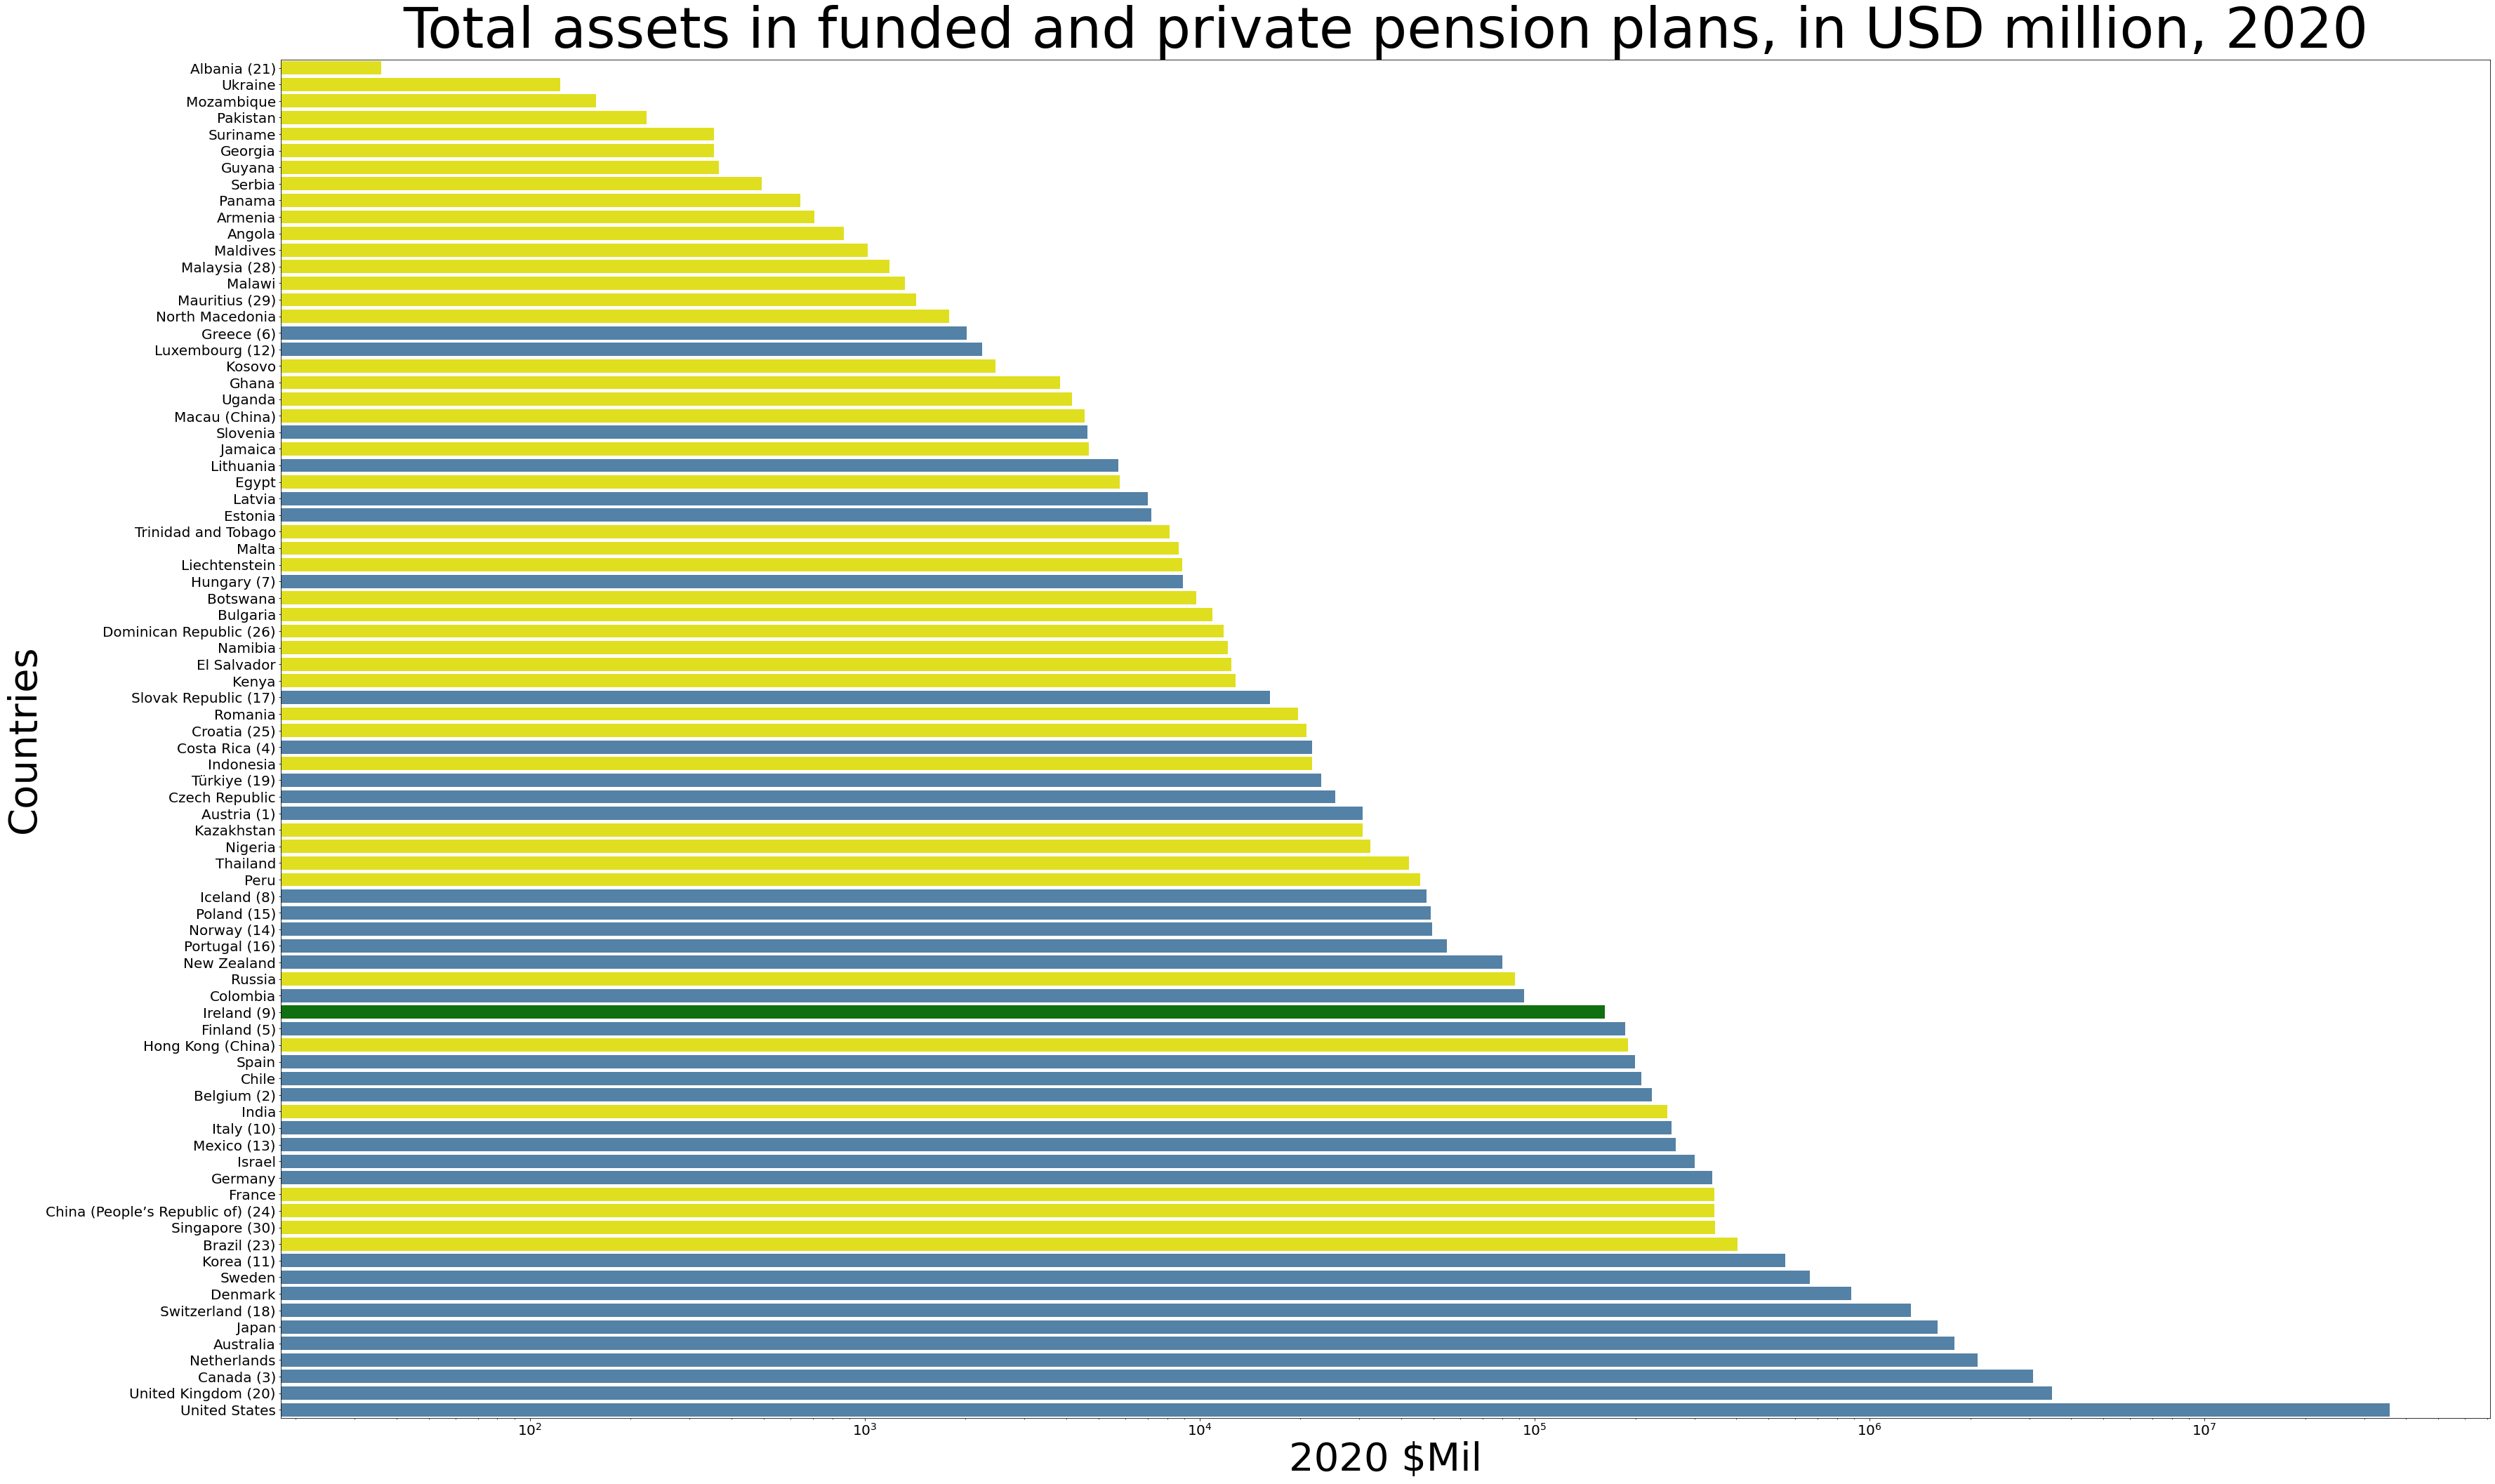

In [201]:
# Sort the dataframe by the column '2020 $Mil'
sorted_df = merged_df.sort_values('2020 $Mil')

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(50, 30))

# Create a custom color palette for the groups
custom_palette = ['yellow' if group == 'Non-OECD Countries' else 'steelblue' if group == 'OECD Countries' else 'green' for group in sorted_df['Group']]

# Set the x-axis scale to logarithmic
plt.xscale('log')

# Create the bar chart using Seaborn with the custom color palette
sns.barplot(x=sorted_df['2020 $Mil'], y=sorted_df['Countries'], ax=ax1, palette=custom_palette)

# Set the labels and title
ax1.set_xlabel('2020 $Mil', fontsize=56)
ax1.set_ylabel('Countries', fontsize=56)
ax1.set_title('Total assets in funded and private pension plans, in USD million, 2020', fontsize=80)

# Set the font size of x and y ticks
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# Adjust spacing between subplots and labels
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()

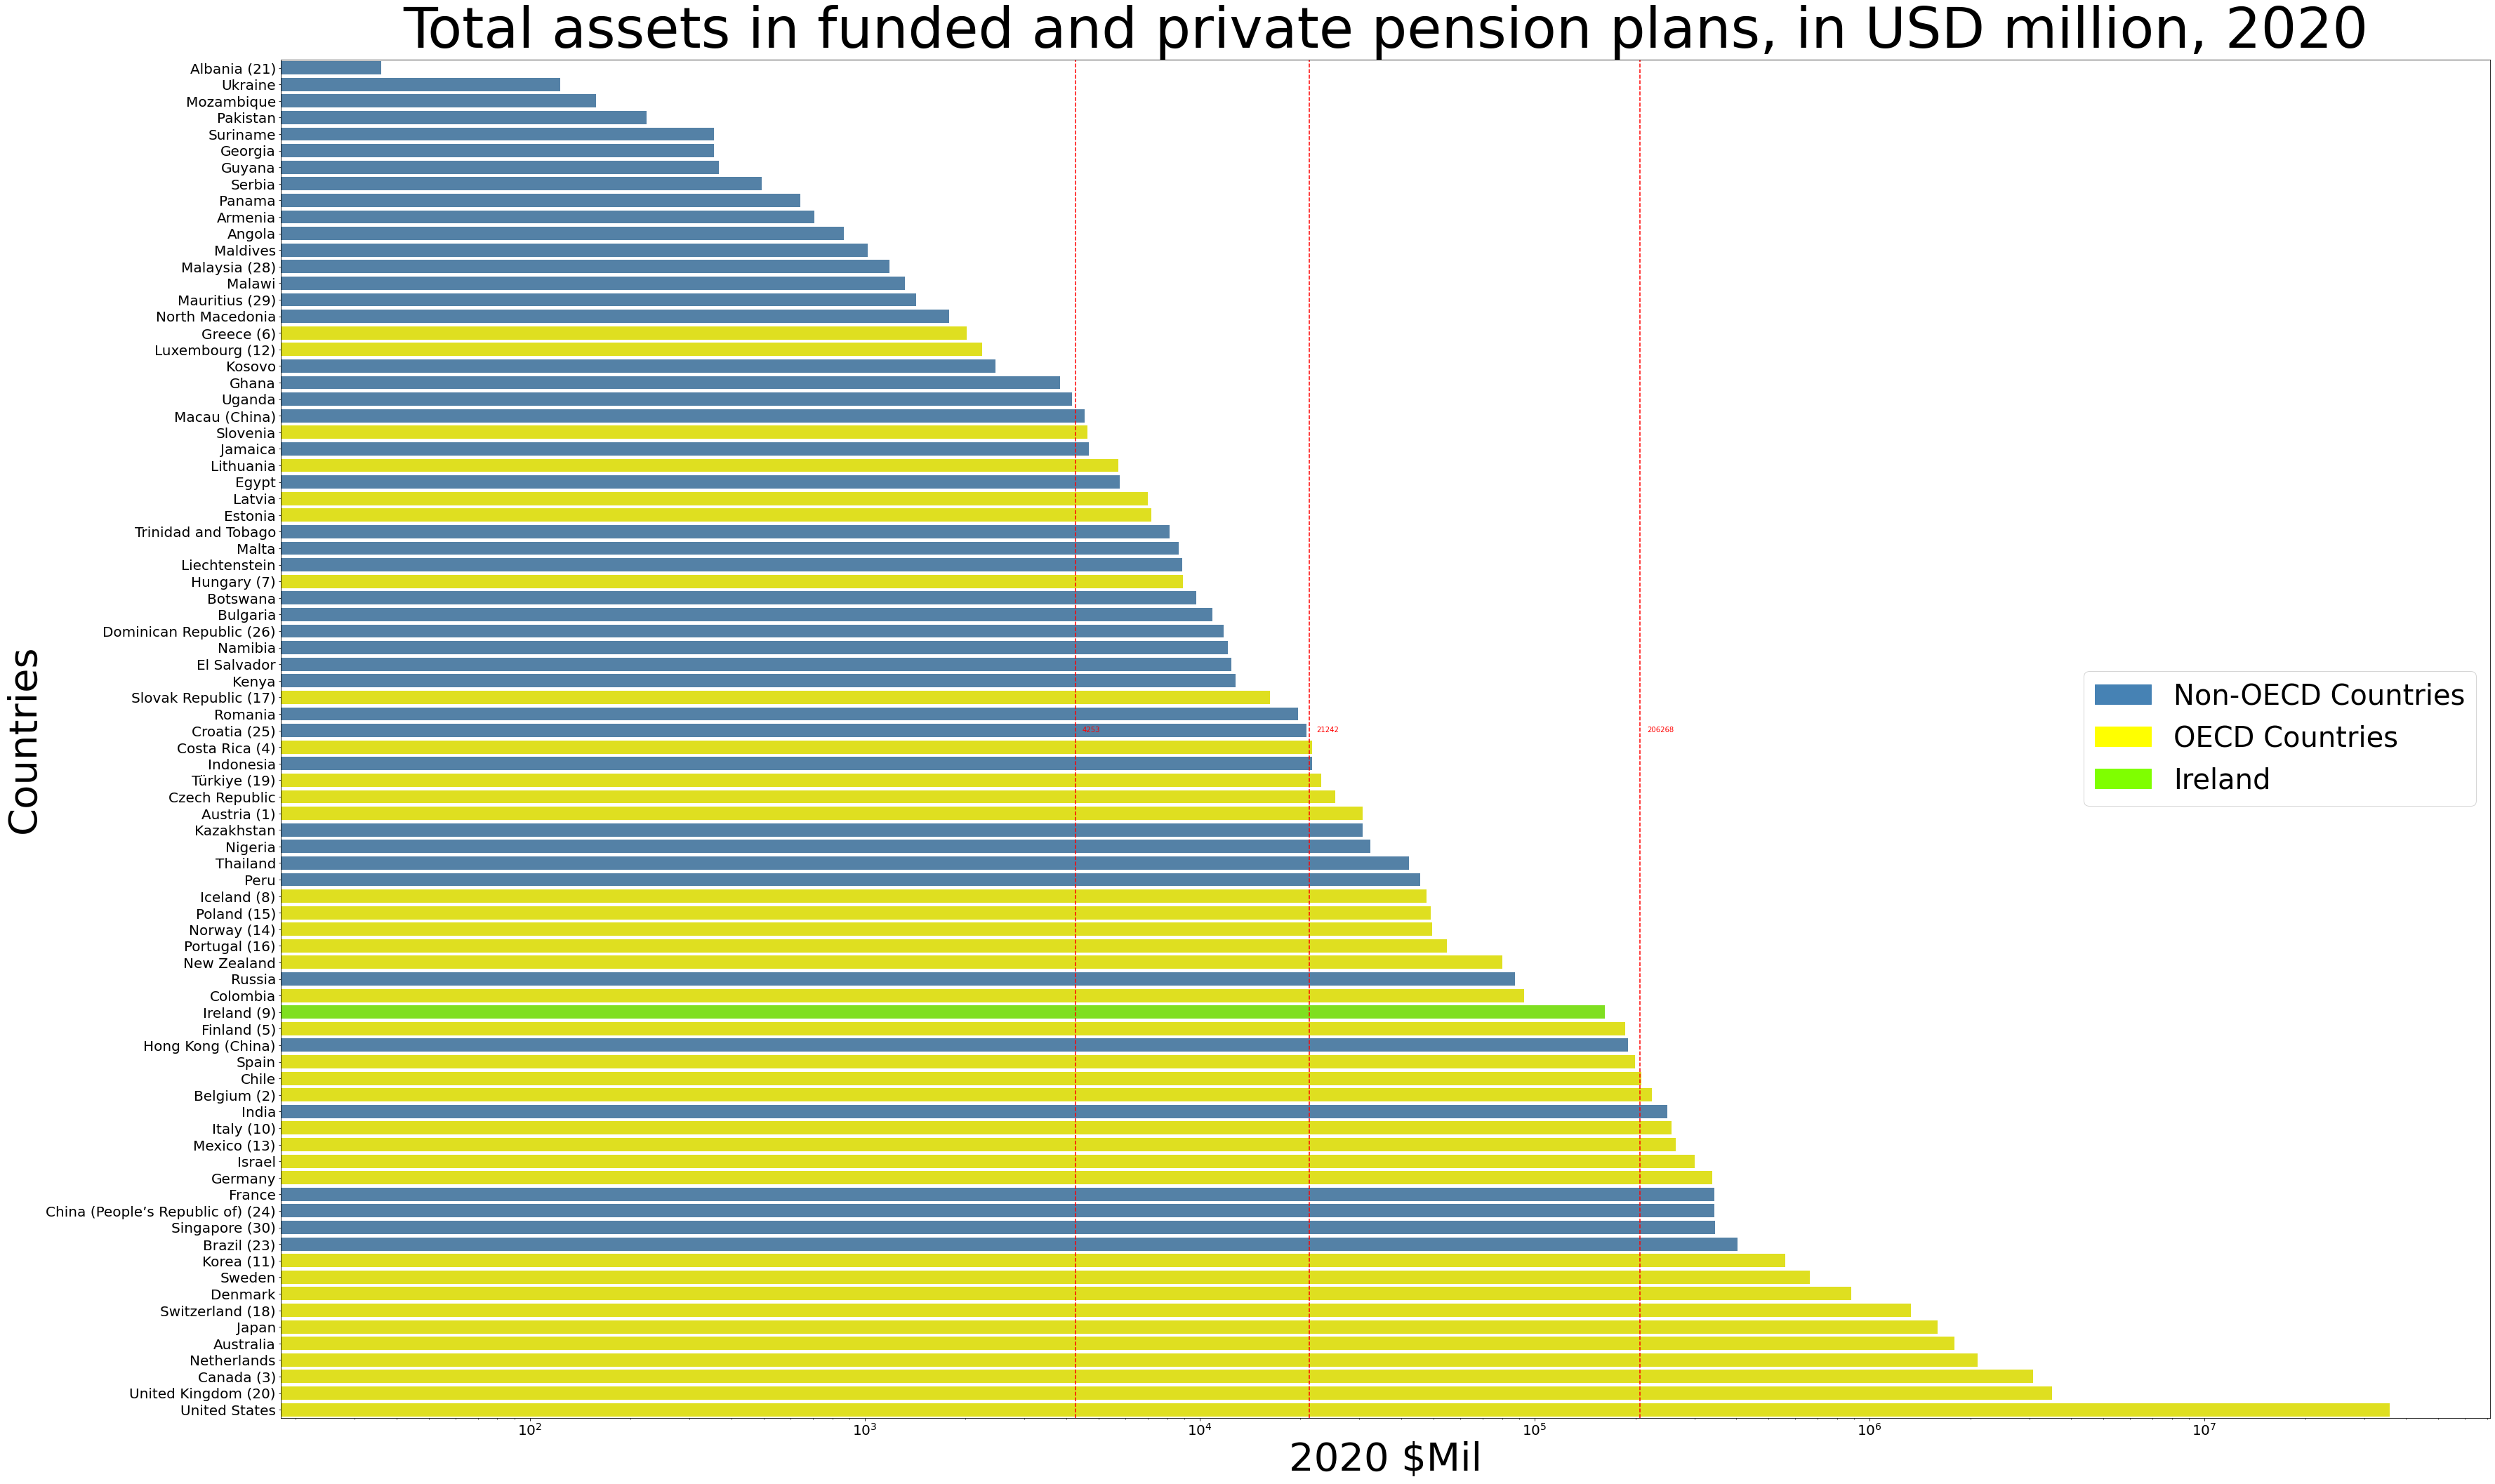

In [205]:
import matplotlib.patches as mpatches
sorted_df = merged_df.sort_values('2020 $Mil')
fig, ax1 = plt.subplots(figsize=(50, 30))
custom_palette = ['steelblue' if group == 'Non-OECD Countries' else 'yellow' if group == 'OECD Countries' else 'chartreuse' for group in sorted_df['Group']]
plt.xscale('log')
sns.barplot(x=sorted_df['2020 $Mil'], y=sorted_df['Countries'], ax=ax1, palette=custom_palette)
ax1.set_xlabel('2020 $Mil', fontsize=56)
ax1.set_ylabel('Countries', fontsize=56)
ax1.set_title('Total assets in funded and private pension plans, in USD million, 2020', fontsize=80)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
fig.tight_layout(pad=3.0)

# Create custom legend patches
legend_patches = [
    mpatches.Patch(color='steelblue', label='Non-OECD Countries'),
    mpatches.Patch(color='yellow', label='OECD Countries'),
    mpatches.Patch(color='chartreuse', label='Ireland')
]

# Add the legend patches to the plot
ax1.legend(handles=legend_patches, loc='right', fontsize=40)

# Add vertical lines or annotations for percentiles
percentiles = [25, 50, 75]  # Set the desired percentile values
percentile_values = np.percentile(sorted_df['2020 $Mil'], percentiles)
for value in percentile_values:
    ax1.axvline(x=value, color='red', linestyle='--')  # Add vertical lines
    ax1.annotate(f'{int(value)}', xy=(value, 0.5), xycoords=('data', 'axes fraction'),
                 xytext=(10, 10), textcoords='offset points', color='red')  # Add value annotations

plt.show()

In [211]:
from scipy.stats import percentileofscore
import math

ireland_value = merged_df.loc[merged_df['Countries'] == 'Ireland (9)', '2020 $Mil'].values[0]
ireland_percentile = math.ceil(percentileofscore(merged_df['2020 $Mil'], ireland_value))

print(f"Ireland is in the {ireland_percentile}st percentile.")

Ireland is in the 71st percentile.


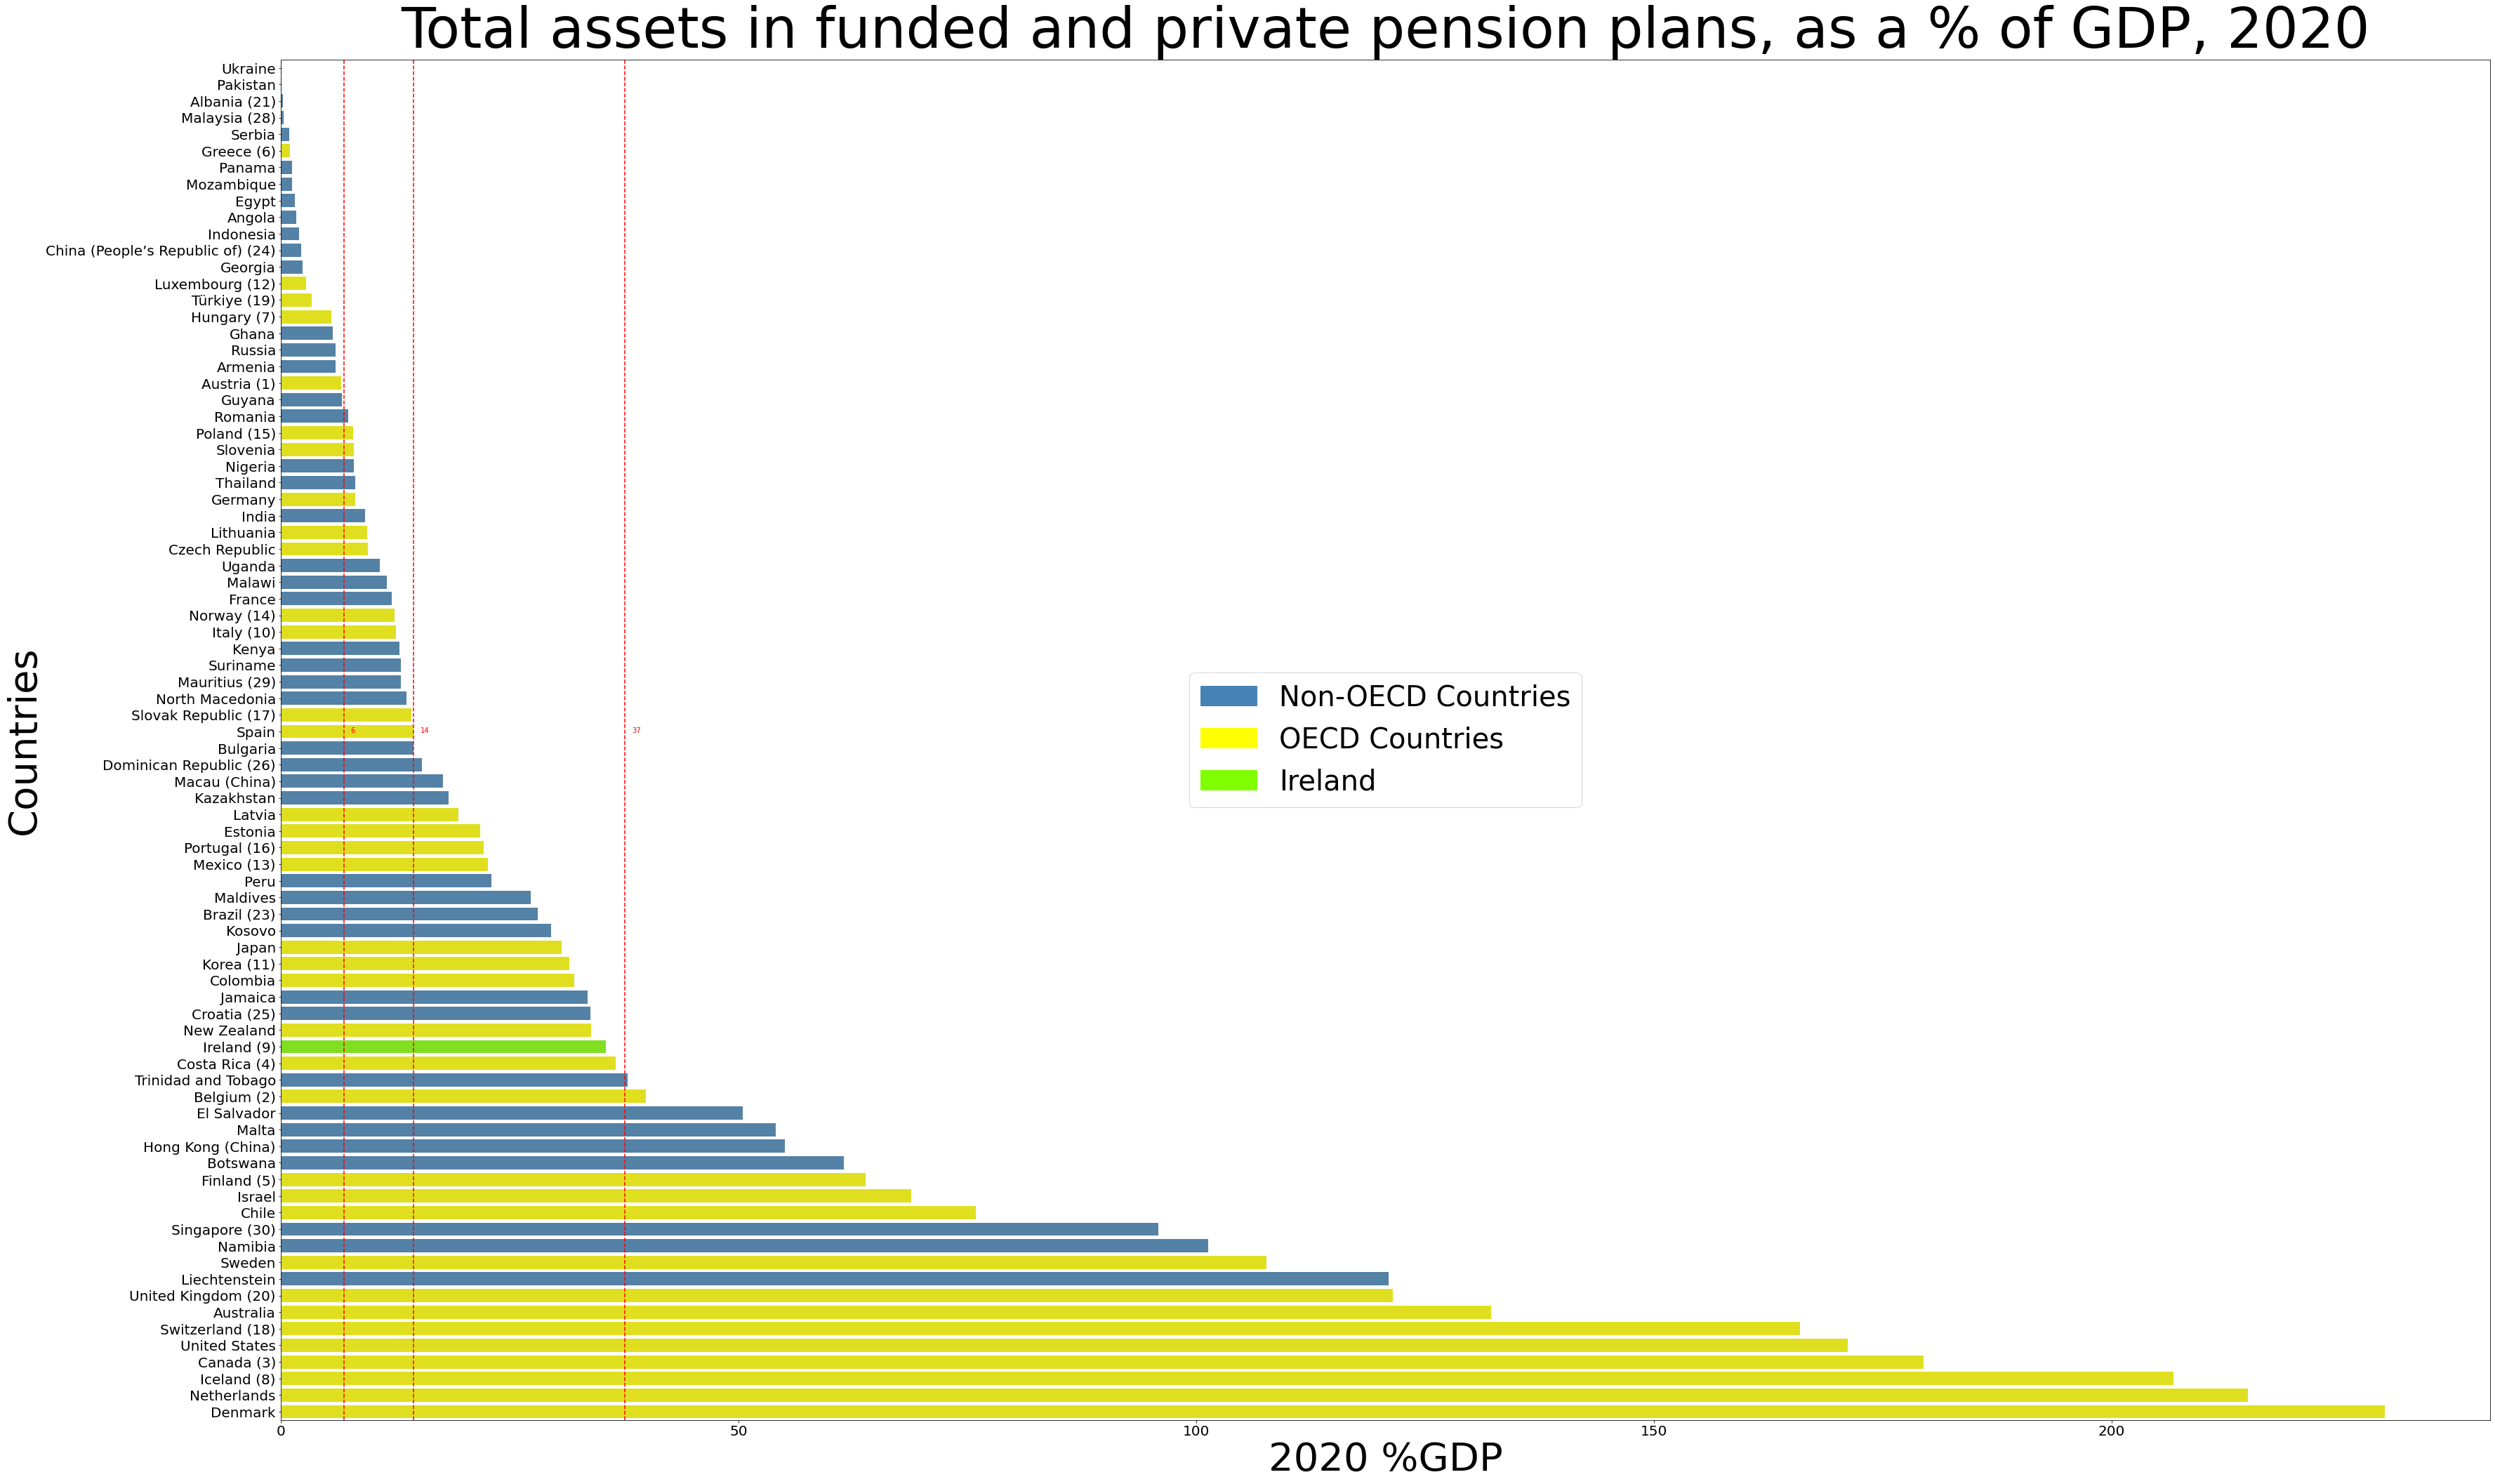

In [233]:
#Repeat for 2020 %GDP
sorted_df1 = merged_df.sort_values('2020 %GDP')
fig, ax1 = plt.subplots(figsize=(50, 30))
custom_palette = ['steelblue' if group == 'Non-OECD Countries' else 'yellow' if group == 'OECD Countries' else 'chartreuse' for group in sorted_df1['Group']]
sns.barplot(x=sorted_df1['2020 %GDP'], y=sorted_df1['Countries'], ax=ax1, palette=custom_palette)
ax1.set_xlabel('2020 %GDP', fontsize=56)
ax1.set_ylabel('Countries', fontsize=56)
ax1.set_title('Total assets in funded and private pension plans, as a % of GDP, 2020', fontsize=80)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
fig.tight_layout(pad=3.0)
legend_patches = [
    mpatches.Patch(color='steelblue', label='Non-OECD Countries'),
    mpatches.Patch(color='yellow', label='OECD Countries'),
    mpatches.Patch(color='chartreuse', label='Ireland')
]
ax1.legend(handles=legend_patches, loc='center', fontsize=40)
percentiles = [25, 50, 75]  # Set the desired percentile values
percentile_values = np.percentile(sorted_df['2020 %GDP'], percentiles)
for value in percentile_values:
    ax1.axvline(x=value, color='red', linestyle='--')  # Add vertical lines
    ax1.annotate(f'{int(value)}', xy=(value, 0.5), xycoords=('data', 'axes fraction'),
                 xytext=(10, 10), textcoords='offset points', color='red')  # Add value annotations

plt.show()

In [213]:
from scipy.stats import percentileofscore
import math

ireland_value = merged_df.loc[merged_df['Countries'] == 'Ireland (9)', '2020 %GDP'].values[0]
ireland_percentile = math.ceil(percentileofscore(merged_df['2020 %GDP'], ireland_value))

print(f"Ireland is in the {ireland_percentile}th percentile.")

Ireland is in the 74th percentile.


In [214]:
import requests

# Construct the SDMX-JSON API URL
url = f"http://stats.oecd.org/sdmx-json/data/PAG/AUS+AUT+BEL+CAN+CZE+DNK+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ITA+JPN+KOR+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+ESP+SWE+CHE+TUR+GBR+USA+BGR+CHL+CYP+EST+ISR+LVA+LTU+MLT+ROU+SVN+ARG+BRA+CHN+IND+IDN+RUS+SAU+ZAF+OAVG+HRV+COL+CRI+EU27.PEN3B+PEN4B/all?startTime=2020&endTime=2020&dimensionAtObservation=allDimensions"
# Send a GET request to the API URL
response = requests.get(url)

# Check the response status code
if response.status_code == 200:
    # Parse the response as JSON
    json_data = response.json()
    for key, value in json_data.items():
        print(key + ':', value)
type(json_data)

header: {'id': 'f8116760-8ff5-4a8f-80ba-735bd46552cc', 'test': False, 'prepared': '2023-07-18T14:34:58.320487Z', 'sender': {'id': 'OECD', 'name': 'Organisation for Economic Co-operation and Development'}, 'links': [{'href': 'https://stats.oecd.org:443/sdmx-json/data/PAG/AUS+AUT+BEL+CAN+CZE+DNK+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ITA+JPN+KOR+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+ESP+SWE+CHE+TUR+GBR+USA+BGR+CHL+CYP+EST+ISR+LVA+LTU+MLT+ROU+SVN+ARG+BRA+CHN+IND+IDN+RUS+SAU+ZAF+OAVG+HRV+COL+CRI+EU27.PEN3B+PEN4B/all?startTime=2020&endTime=2020&dimensionAtObservation=allDimensions', 'rel': 'request'}]}
dataSets: [{'action': 'Information', 'observations': {'0:0:0': [31.3, 0, None, 0, 0, None], '0:1:0': [28.4, 0, None, 0, 0, None], '1:0:0': [74.1, 0, None, 0, 0, None], '1:1:0': [74.1, 0, None, 0, 0, None], '2:0:0': [43.4, 0, None, 0, 0, None], '2:1:0': [43.4, 0, None, 0, 0, None], '3:0:0': [38.8, 0, None, 0, 0, None], '3:1:0': [38.8, 0, None, 0, 0, None], '4:0:0': [49.0, 0, None, 0, 0, None], '4:1:0': [49.0, 

dict

In [215]:
#Creating a sub-dictionary for "observations"
observations = {
    '0:0:0': [31.3, 0, None, 0, 0, None],
    '0:1:0': [28.4, 0, None, 0, 0, None],
    '1:0:0': [74.1, 0, None, 0, 0, None],
    '1:1:0': [74.1, 0, None, 0, 0, None], 
    '2:0:0': [43.4, 0, None, 0, 0, None],
    '2:1:0': [43.4, 0, None, 0, 0, None],
    '3:0:0': [38.8, 0, None, 0, 0, None],
    '3:1:0': [38.8, 0, None, 0, 0, None],
    '4:0:0': [49.0, 0, None, 0, 0, None],
    '4:1:0': [49.0, 0, None, 0, 0, None],
    '5:0:0': [80.0, 0, None, 0, 0, None],
    '5:1:0': [80.0, 0, None, 0, 0, None],
    '6:0:0': [56.6, 0, None, 0, 0, None],
    '6:1:0': [56.6, 0, None, 0, 0, None],
    '7:0:0': [60.2, 0, None, 0, 0, None],
    '7:1:0': [60.2, 0, None, 0, 0, None],
    '8:0:0': [41.5, 0, None, 0, 0, None],
    '8:1:0': [41.5, 0, None, 0, 0, None],
    '9:0:0': [72.6, 0, None, 0, 0, None],
    '9:1:0': [72.6, 0, None, 0, 0, None],
    '10:0:0': [62.5, 0, None, 0, 0, None],
    '10:1:0': [58.1, 0, None, 0, 0, None],
    '11:0:0': [51.8, 0, None, 0, 0, None],
    '11:1:0': [51.8, 0, None, 0, 0, None],
    '12:0:0': [29.7, 0, None, 0, 0, None],
    '12:1:0': [29.7, 0, None, 0, 0, None],
    '13:0:0': [74.6, 0, None, 0, 0, None],
    '13:1:0': [74.6, 0, None, 0, 0, None],
    '14:0:0': [32.4, 0, None, 0, 0, None],
    '14:1:0': [32.4, 0, None, 0, 0, None],
    '15:0:0': [31.2, 0, None, 0, 0, None],
    '15:1:0': [31.2, 0, None, 0, 0, None],
    '16:0:0': [76.6, 0, None, 0, 0, None],
    '16:1:0': [76.6, 0, None, 0, 0, None],
    '17:0:0': [61.2, 0, None, 0, 0, None],
    '17:1:0': [58.2, 0, None, 0, 0, None],
    '18:0:0': [69.7, 0, None, 0, 0, None],
    '18:1:0': [69.7, 0, None, 0, 0, None],
    '19:0:0': [39.8, 0, None, 0, 0, None],
    '19:1:0': [39.8, 0, None, 0, 0, None],
    '20:0:0': [46.0, 0, None, 0, 0, None],
    '20:1:0': [46.0, 0, None, 0, 0, None],
    '21:0:0': [30.6, 0, None, 0, 0, None],
    '21:1:0': [23.4, 0, None, 0, 0, None],
    '22:0:0': [74.9, 0, None, 0, 0, None],
    '22:1:0': [74.9, 0, None, 0, 0, None],
    '23:0:0': [53.1, 0, None, 0, 0, None],
    '23:1:0': [53.1, 0, None, 0, 0, None],
    '24:0:0': [73.9, 0, None, 0, 0, None],
    '24:1:0': [73.9, 0, None, 0, 0, None],
    '25:0:0': [53.3, 0, None, 0, 0, None],
    '25:1:0': [53.3, 0, None, 0, 0, None],
    '26:0:0': [44.1, 0, None, 0, 0, None],
    '26:1:0': [43.5, 0, None, 0, 0, None],
    '27:0:0': [73.3, 0, None, 0, 0, None],
    '27:1:0': [70.3, 0, None, 0, 0, None],
    '28:0:0': [49.0, 0, None, 0, 0, None],
    '28:1:0': [49.0, 0, None, 0, 0, None],
    '29:0:0': [39.2, 0, None, 0, 0, None],
    '29:1:0': [39.2, 0, None, 0, 0, None],
    '30:0:0': [76.1, 0, None, 0, 0, None],
    '30:1:0': [72.9, 0, None, 0, 0, None],
    '31:0:0': [88.4, 0, None, 0, 0, None],
    '31:1:0': [93.3, 0, None, 0, 0, None], 
    '32:0:0': [31.2, 0, None, 0, 0, None],
    '32:1:0': [28.8, 0, None, 0, 0, None],
    '33:0:0': [71.6, 0, None, 0, 0, None],
    '33:1:0': [55.7, 0, None, 0, 0, None],
    '34:0:0': [28.0, 0, None, 0, 0, None],
    '34:1:0': [28.0, 0, None, 0, 0, None],
    '35:0:0': [56.4, 0, None, 0, 0, None],
    '35:1:0': [55.6, 0, None, 0, 0, None],
    '36:0:0': [55.3, 0, None, 0, 0, None],
    '36:1:0': [53.0, 0, None, 0, 0, None],
    '37:0:0': [41.5, 0, None, 0, 0, None],
    '37:1:0': [34.1, 0, None, 0, 0, None],
    '38:0:0': [47.2, 0, None, 0, 0, None],
    '38:1:0': [43.4, 0, None, 0, 0, None],
    '39:0:0': [59.6, 0, None, 0, 0, None],
    '39:1:0': [59.6, 0, None, 0, 0, None],
    '40:0:0': [42.0, 0, None, 0, 0, None], 
    '40:1:0': [42.0, 0, None, 0, 0, None],
    '41:0:0': [14.9, 0, None, 0, 0, None],
    '41:1:0': [14.9, 0, None, 0, 0, None],
    '42:0:0': [51.8, 0, None, 0, 0, None],
    '42:1:0': [50.9, 0, None, 0, 0, None],
    '43:0:0': [57.3, 0, None, 0, 0, None],
    '43:1:0': [57.3, 0, None, 0, 0, None],
    '44:0:0': [38.0, 0, None, 0, 0, None],
    '44:1:0': [38.0, 0, None, 0, 0, None],
    '45:0:0': [64.5, 0, None, 0, 0, None],
    '45:1:0': [64.5, 0, None, 0, 0, None],
    '46:0:0': [43.4, 0, None, 0, 0, None],
    '46:1:0': [43.4, 0, None, 0, 0, None],
    '47:0:0': [19.7, 0, None, 0, 0, None],
    '47:1:0': [19.7, 0, None, 0, 0, None],
    '48:0:0': [57.6, 0, None, 0, 0, None],
    '48:1:0': [57.6, 0, None, 0, 0, None],
    '49:0:0': [40.6, 0, None, 0, 0, None],
    '49:1:0': [38.0, 0, None, 0, 0, None],
    '50:0:0': [74.8, 0, None, 0, 0, None],
    '50:1:0': [73.4, 0, None, 0, 0, None],
    '51:0:0': [71.9, 0, None, 0, 0, None],
    '51:1:0': [71.9, 0, None, 0, 0, None],
    '52:0:0': [54.3, 0, None, 0, 0, None],
    '52:1:0': [53.8, 0, None, 0, 0, None]
}

In [216]:
#Creating a dataframe for observations
df_observations = pd.DataFrame.from_dict(observations, orient='index', columns=['Gross pension replacement rate', 'Unknown1', 'Unknown2', 'Unknown3', 'Unknown4', 'Unknown5'])
print (df_observations)

        Gross pension replacement rate  Unknown1 Unknown2  Unknown3  Unknown4  \
0:0:0                             31.3         0     None         0         0   
0:1:0                             28.4         0     None         0         0   
1:0:0                             74.1         0     None         0         0   
1:1:0                             74.1         0     None         0         0   
2:0:0                             43.4         0     None         0         0   
...                                ...       ...      ...       ...       ...   
50:1:0                            73.4         0     None         0         0   
51:0:0                            71.9         0     None         0         0   
51:1:0                            71.9         0     None         0         0   
52:0:0                            54.3         0     None         0         0   
52:1:0                            53.8         0     None         0         0   

       Unknown5  
0:0:0    

In [220]:
#Trying to create a list of dictionaries data from "dimensions" in the above json output
data= [{'id': 'AUS', 'name': 'Australia'}, {'id': 'AUT', 'name': 'Austria'}, {'id': 'BEL', 'name': 'Belgium'}, {'id': 'CAN', 'name': 'Canada'}, {'id': 'CZE', 'name': 'Czech Republic'}, {'id': 'DNK', 'name': 'Denmark'}, {'id': 'FIN', 'name': 'Finland'}, {'id': 'FRA', 'name': 'France'}, {'id': 'DEU', 'name': 'Germany'}, {'id': 'GRC', 'name': 'Greece'}, {'id': 'HUN', 'name': 'Hungary'}, {'id': 'ISL', 'name': 'Iceland'}, {'id': 'IRL', 'name': 'Ireland'}, {'id': 'ITA', 'name': 'Italy'}, {'id': 'JPN', 'name': 'Japan'}, {'id': 'KOR', 'name': 'Korea'}, {'id': 'LUX', 'name': 'Luxembourg'}, {'id': 'MEX', 'name': 'Mexico'}, {'id': 'NLD', 'name': 'Netherlands'}, {'id': 'NZL', 'name': 'New Zealand'}, {'id': 'NOR', 'name': 'Norway'}, {'id': 'POL', 'name': 'Poland'}, {'id': 'PRT', 'name': 'Portugal'}, {'id': 'SVK', 'name': 'Slovak Republic'}, {'id': 'ESP', 'name': 'Spain'}, {'id': 'SWE', 'name': 'Sweden'}, {'id': 'CHE', 'name': 'Switzerland'}, {'id': 'TUR', 'name': 'Türkiye'}, {'id': 'GBR', 'name': 'United Kingdom'}, {'id': 'USA', 'name': 'United States'}, {'id': 'ARG', 'name': 'Argentina'}, {'id': 'BRA', 'name': 'Brazil'}, {'id': 'CHL', 'name': 'Chile'}, {'id': 'CHN', 'name': "China (People's Republic of)"}, {'id': 'EST', 'name': 'Estonia'}, {'id': 'IND', 'name': 'India'}, {'id': 'IDN', 'name': 'Indonesia'}, {'id': 'ISR', 'name': 'Israel'}, {'id': 'RUS', 'name': 'Russia'}, {'id': 'SAU', 'name': 'Saudi Arabia'}, {'id': 'SVN', 'name': 'Slovenia'}, {'id': 'ZAF', 'name': 'South Africa'}, {'id': 'OAVG', 'name': 'OECD - Average'}, {'id': 'BGR', 'name': 'Bulgaria'}, {'id': 'HRV', 'name': 'Croatia'}, {'id': 'CYP', 'name': 'Cyprus'}, {'id': 'LVA', 'name': 'Latvia'}, {'id': 'LTU', 'name': 'Lithuania'}, {'id': 'MLT', 'name': 'Malta'}, {'id': 'ROU', 'name': 'Romania'}, {'id': 'COL', 'name': 'Colombia'}, {'id': 'CRI', 'name': 'Costa Rica'}, {'id': 'EU27', 'name': 'European Union (27 countries)'}]

In [221]:
# String representation of the list of dictionaries
data_str = "[{'id': 'AUS', 'name': 'Australia'}, {'id': 'AUT', 'name': 'Austria'}, {'id': 'BEL', 'name': 'Belgium'}, {'id': 'CAN', 'name': 'Canada'}, {'id': 'CZE', 'name': 'Czech Republic'}, {'id': 'DNK', 'name': 'Denmark'}, {'id': 'FIN', 'name': 'Finland'}, {'id': 'FRA', 'name': 'France'}, {'id': 'DEU', 'name': 'Germany'}, {'id': 'GRC', 'name': 'Greece'}, {'id': 'HUN', 'name': 'Hungary'}, {'id': 'ISL', 'name': 'Iceland'}, {'id': 'IRL', 'name': 'Ireland'}, {'id': 'ITA', 'name': 'Italy'}, {'id': 'JPN', 'name': 'Japan'}, {'id': 'KOR', 'name': 'Korea'}, {'id': 'LUX', 'name': 'Luxembourg'}, {'id': 'MEX', 'name': 'Mexico'}, {'id': 'NLD', 'name': 'Netherlands'}, {'id': 'NZL', 'name': 'New Zealand'}, {'id': 'NOR', 'name': 'Norway'}, {'id': 'POL', 'name': 'Poland'}, {'id': 'PRT', 'name': 'Portugal'}, {'id': 'SVK', 'name': 'Slovak Republic'}, {'id': 'ESP', 'name': 'Spain'}, {'id': 'SWE', 'name': 'Sweden'}, {'id': 'CHE', 'name': 'Switzerland'}, {'id': 'TUR', 'name': 'Türkiye'}, {'id': 'GBR', 'name': 'United Kingdom'}, {'id': 'USA', 'name': 'United States'}, {'id': 'ARG', 'name': 'Argentina'}, {'id': 'BRA', 'name': 'Brazil'}, {'id': 'CHL', 'name': 'Chile'}, {'id': 'CHN', 'name': 'China'}, {'id': 'EST', 'name': 'Estonia'}, {'id': 'IND', 'name': 'India'}, {'id': 'IDN', 'name': 'Indonesia'}, {'id': 'ISR', 'name': 'Israel'}, {'id': 'RUS', 'name': 'Russia'}, {'id': 'SAU', 'name': 'Saudi Arabia'}, {'id': 'SVN', 'name': 'Slovenia'}, {'id': 'ZAF', 'name': 'South Africa'}, {'id': 'OAVG', 'name': 'OECD - Average'}, {'id': 'BGR', 'name': 'Bulgaria'}, {'id': 'HRV', 'name': 'Croatia'}, {'id': 'CYP', 'name': 'Cyprus'}, {'id': 'LVA', 'name': 'Latvia'}, {'id': 'LTU', 'name': 'Lithuania'}, {'id': 'MLT', 'name': 'Malta'}, {'id': 'ROU', 'name': 'Romania'}, {'id': 'COL', 'name': 'Colombia'}, {'id': 'CRI', 'name': 'Costa Rica'}, {'id': 'EU27', 'name': 'European Union (27 countries)'}]"

# Convert the string into a list of dictionaries
data = eval(data_str)

# Extract 'id' and 'name' columns into separate Series
id_series = pd.Series([item['id'] for item in data])
name_series = pd.Series([item['name'] for item in data])

# Create a DataFrame from the Series
df_countries = pd.DataFrame({'id': id_series, 'name': name_series})

print(df_countries)


      id                           name
0    AUS                      Australia
1    AUT                        Austria
2    BEL                        Belgium
3    CAN                         Canada
4    CZE                 Czech Republic
5    DNK                        Denmark
6    FIN                        Finland
7    FRA                         France
8    DEU                        Germany
9    GRC                         Greece
10   HUN                        Hungary
11   ISL                        Iceland
12   IRL                        Ireland
13   ITA                          Italy
14   JPN                          Japan
15   KOR                          Korea
16   LUX                     Luxembourg
17   MEX                         Mexico
18   NLD                    Netherlands
19   NZL                    New Zealand
20   NOR                         Norway
21   POL                         Poland
22   PRT                       Portugal
23   SVK                Slovak Republic


In [222]:
# Duplicate every row to line up with the observations dataframe
df_countries = df_countries.loc[df_countries.index.repeat(2)].reset_index(drop=True)

# Add the 'gender' column
df_countries['gender'] = ['Men', 'Women'] * (len(df_countries) // 2)

# Print the updated DataFrame
print(df_countries)

       id                           name gender
0     AUS                      Australia    Men
1     AUS                      Australia  Women
2     AUT                        Austria    Men
3     AUT                        Austria  Women
4     BEL                        Belgium    Men
..    ...                            ...    ...
101   COL                       Colombia  Women
102   CRI                     Costa Rica    Men
103   CRI                     Costa Rica  Women
104  EU27  European Union (27 countries)    Men
105  EU27  European Union (27 countries)  Women

[106 rows x 3 columns]


In [223]:
# Reset the index of df_observations and df_countries
df_observations = df_observations.reset_index(drop=True)
df_countries = df_countries.reset_index(drop=True)

# Concatenate df_observations and df_countries along the columns axis
df_combined = pd.concat([df_observations, df_countries], axis=1)

# Print the combined DataFrame
print(df_combined)

     Gross pension replacement rate  Unknown1 Unknown2  Unknown3  Unknown4  \
0                              31.3         0     None         0         0   
1                              28.4         0     None         0         0   
2                              74.1         0     None         0         0   
3                              74.1         0     None         0         0   
4                              43.4         0     None         0         0   
..                              ...       ...      ...       ...       ...   
101                            73.4         0     None         0         0   
102                            71.9         0     None         0         0   
103                            71.9         0     None         0         0   
104                            54.3         0     None         0         0   
105                            53.8         0     None         0         0   

    Unknown5    id                           name gender  
0   

In [224]:
# Group by 'id' and 'name' and calculate the mean of 'Gross pension replacement rate'
df_average = df_combined.groupby(['id', 'name']).mean().reset_index()

# Print the new dataframe with average gross replacement rates
print(df_average)

      id                           name  Gross pension replacement rate  \
0    ARG                      Argentina                           74.50   
1    AUS                      Australia                           29.85   
2    AUT                        Austria                           74.10   
3    BEL                        Belgium                           43.40   
4    BGR                       Bulgaria                           57.30   
5    BRA                         Brazil                           90.85   
6    CAN                         Canada                           38.80   
7    CHE                    Switzerland                           43.80   
8    CHL                          Chile                           30.00   
9    CHN                          China                           63.65   
10   COL                       Colombia                           74.10   
11   CRI                     Costa Rica                           71.90   
12   CYP                 

In [225]:
# Drop the last 3 columns
df_new = df_average.drop(columns=['Unknown1', 'Unknown3', 'Unknown4'])

# Print the new dataframe
print(df_new)

      id                           name  Gross pension replacement rate
0    ARG                      Argentina                           74.50
1    AUS                      Australia                           29.85
2    AUT                        Austria                           74.10
3    BEL                        Belgium                           43.40
4    BGR                       Bulgaria                           57.30
5    BRA                         Brazil                           90.85
6    CAN                         Canada                           38.80
7    CHE                    Switzerland                           43.80
8    CHL                          Chile                           30.00
9    CHN                          China                           63.65
10   COL                       Colombia                           74.10
11   CRI                     Costa Rica                           71.90
12   CYP                         Cyprus                         

In [226]:
# Sort the dataframe by "Gross pension replacement rate"
df_sorted = df_new.sort_values(by='Gross pension replacement rate')

# Print the sorted dataframe
print(df_sorted)

      id                           name  Gross pension replacement rate
52   ZAF                   South Africa                           14.90
33   LTU                      Lithuania                           19.70
42   POL                         Poland                           27.00
17   EST                        Estonia                           28.00
27   IRL                        Ireland                           29.70
1    AUS                      Australia                           29.85
8    CHL                          Chile                           30.00
32   KOR                          Korea                           31.20
31   JPN                          Japan                           32.40
29   ISR                         Israel                           37.80
23   HRV                        Croatia                           38.00
6    CAN                         Canada                           38.80
51   USA                  United States                         

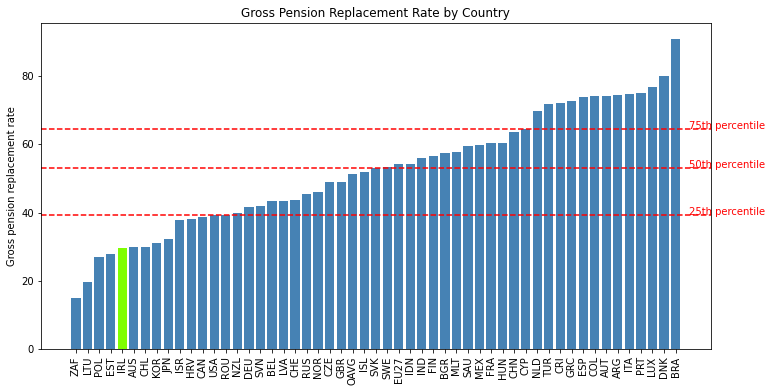

In [231]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Define the colors
colors = ['Chartreuse' if id == 'IRL' else 'steelblue' for id in df_sorted['id']]

# Plot the data
plt.bar(df_sorted['id'], df_sorted['Gross pension replacement rate'], color=colors)

# Set the x-axis labels
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Gross pension replacement rate')

# Set the title
plt.title('Gross Pension Replacement Rate by Country')

# Calculate percentiles
percentiles = np.percentile(df_sorted['Gross pension replacement rate'], [25, 50, 75])

# Add vertical lines for percentiles
for percentile in percentiles:
    plt.axhline(percentile, color='red', linestyle='--')

# Add percentiles labels
plt.text(len(df_sorted['id']) + 0.2, percentiles[0], '25th percentile', color='red')
plt.text(len(df_sorted['id']) + 0.2, percentiles[1], '50th percentile', color='red')
plt.text(len(df_sorted['id']) + 0.2, percentiles[2], '75th percentile', color='red')

# Show the plot
plt.show()

In [232]:
ireland_value = df_sorted.loc[df_sorted['name'] == 'Ireland', 'Gross pension replacement rate'].values[0]
ireland_percentile = math.ceil(percentileofscore(df_sorted['Gross pension replacement rate'], ireland_value))

print(f"Ireland is in the {ireland_percentile}th percentile.")

Ireland is in the 10th percentile.
